In [1]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5 #训练样本数、测试样本数、输入维度、批量大小
true_w, true_b = torch.ones([num_inputs, 1]) * 0.01, 0.05 #真实的权重
train_data = d2l.synthetic_data(true_w, true_b, n_train) #训练数据集 synthetic_data函数:生成一个人工数据集
train_iter = d2l.load_array(train_data, batch_size, is_train = True) #训练的一个批次 load_array函数:读取一个批次的人工数据集
test_data = d2l.synthetic_data(true_w, true_b, n_test) #测试数据集
test_iter = d2l.load_array(test_data, batch_size, is_train = False) #测试的一个批次

In [3]:
w = torch.normal(0, 1, [num_inputs, 1], requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [4]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2 #首先w是一个向量,然后因为l2范数是需要开根号的,但是正则化项中是l2范数的平方,因此这边只需要把每一项求平方再求和即可,除以2是因为一般都会除个2方便求导,在这里除是方便后期直接加个λ就行

time:6.35sec


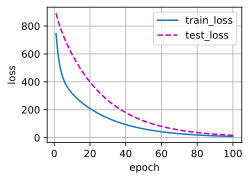

In [5]:
lamda = 1
epochs, lr = 100, 0.001
updater = torch.optim.SGD([w, b], lr)

train_loss = []
test_loss = []
epochs_plot = []

animator = d2l.Animator(xlabel = 'epoch', ylabel = 'loss', legend = ['train_loss', 'test_loss'])

timer = d2l.Timer()

#epoch指的是扫多少遍数据,而batch_size决定了扫一遍数据跑多少轮,例如数据集是1000个,batch_size是200,那么for in iter这个循环就会跑5轮

timer.start()

for epoch in range(epochs):

    train_metric = d2l.Accumulator(2)
    test_metric = d2l.Accumulator(2)

    #训练
    for X, y in train_iter:

        y_hat = d2l.linreg(X, w, b)

        updater.zero_grad()

        loss = d2l.squared_loss(y_hat, y)
        l = loss + lamda * l2_penalty(w)
        l = l.sum()
        l.backward()

        updater.step()

        train_metric.add(l, l.numel())

    train_loss.append(train_metric[0] / train_metric[1])

    #测试
    for X, y in test_iter:

        with torch.no_grad():
            y_hat = d2l.linreg(X, w, b)
            loss = d2l.squared_loss(y_hat, y)
            l = loss
            l = l.sum()

            test_metric.add(l, l.numel())

    test_loss.append(test_metric[0] / test_metric[1])

    epochs_plot.append(epoch + 1)

    animator.add(epoch + 1, (train_metric[0] / train_metric[1], test_metric[0] / test_metric[1]))

print(f'time:{timer.stop():.2f}sec')

Text(0.5, 0, 'epoch')

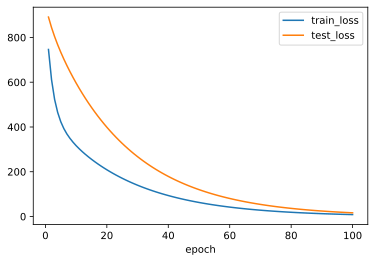

In [6]:
plt.plot(epochs_plot, train_loss, label = 'train_loss')
plt.plot(epochs_plot, test_loss, label = 'test_loss')
plt.legend()
plt.xlabel('epoch')